In [6]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch
import accelerate

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16, load_in_8bit=True)


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
binary_path: c:\users\clshe\documents\python-envs\ai_env\lib\site-packages\bitsandbytes\cuda_setup\libbitsandbytes_cuda116.dll
CUDA SETUP: Loading binary c:\users\clshe\documents\python-envs\ai_env\lib\site-packages\bitsandbytes\cuda_setup\libbitsandbytes_cuda116.dll...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [36]:
# pip install accelerate bitsandbytes
import torch
import requests
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", device_map="cpu")

# model.to("cpu")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "how many dogs are in the picture?"
inputs = processor(raw_image, question, return_tensors="pt").to("cpu", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True).strip())


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

c:\users\clshe\documents\python-envs\ai_env\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [5]:
import requests
from PIL import Image
import matplotlib.pyplot as plt


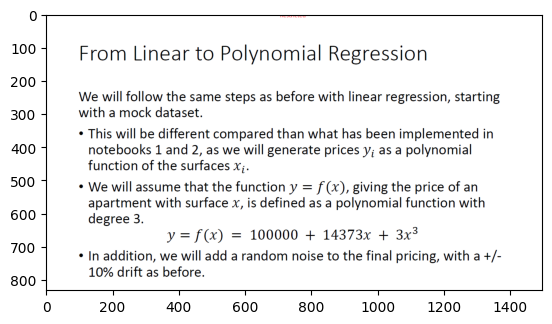

In [37]:
image = Image.open("./data/Picture3.png")
plt.imshow(image)

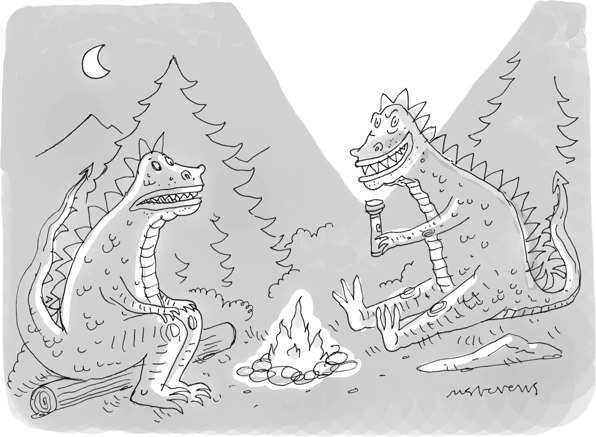

In [10]:
url = 'https://media.newyorker.com/cartoons/63dc6847be24a6a76d90eb99/master/w_1160,c_limit/230213_a26611_838.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')  
display(image.resize((596, 437)))

In [42]:


# question = "what is this picture talking about?"
inputs = processor(image, return_tensors="pt")

out = model.generate(**inputs, max_length=64)
print(processor.decode(out[0], skip_special_tokens=True).strip())

from linear to polynomial regression


In [15]:
print(processor.decode(out[0]).strip())

</s>


In [23]:
# inputs = processor(image, return_tensors="pt", device="cuda:0")

# generated_ids = model.generate(**inputs, max_new_tokens=20)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
# print(generated_text)

In [26]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
ocr_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# load image from the IAM dataset
# url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"
image = Image.open("./data/Picture3.png").convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = ocr_model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0 0


In [28]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

0 0


In [35]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor, from_hub

img = DocumentFile.from_images(['<image_path>'])
# Load your model from the hub
model = from_hub('mindee/my-model')

# Pass it to the predictor
# If your model is a recognition model:
predictor = ocr_predictor(det_arch='db_mobilenet_v3_large',
                          reco_arch=model,
                          pretrained=True)

# If your model is a detection model:
predictor = ocr_predictor(det_arch=model,
                          reco_arch='crnn_mobilenet_v3_small',
                          pretrained=True)

# Get your predictions
res = predictor(img)



-----

WeasyPrint could not import some external libraries. Please carefully follow the installation steps before reporting an issue:
https://doc.courtbouillon.org/weasyprint/stable/first_steps.html#installation
https://doc.courtbouillon.org/weasyprint/stable/first_steps.html#troubleshooting 

-----



OSError: cannot load library 'pango-1.0-0': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'pango-1.0-0'